https://www.kaggle.com/datasets/mohamedhanyyy/top-football-leagues-scorers/data

## Business Understanding
**Business Objective**
Proyek ini bertujuan untuk mengidentifikasi pola pencetak gol terbaik di liga-liga top dunia serta faktor yang mempengaruhi performa mereka, sehingga klub sepak bola dapat membuat keputusan yang lebih efektif dalam perekrutan pemain dan strategi permainan.

**Assess Situation**
Klub sepak bola sering mengalami kesulitan dalam menilai performa pencetak gol terbaik secara objektif, yang dapat menyebabkan keputusan transfer yang kurang tepat dan strategi permainan yang tidak optimal. Analisis berbasis data diperlukan untuk memahami pola performa pemain dan mengoptimalkan strategi tim.

**Data Mining Goals**
Analisis ini akan mengeksplorasi hubungan antara jumlah gol, assist, jumlah pertandingan, dan faktor lain untuk menentukan pola performa pemain, mengelompokkan mereka berdasarkan gaya bermain, serta membangun model prediksi jumlah gol di musim mendatang. Selain itu, sistem rekomendasi berbasis data akan dikembangkan untuk membantu klub dalam memilih pemain yang sesuai dengan kebutuhan tim.

**Project Plan**
Proyek ini mencakup pemeriksaan dan pembersihan data, analisis pola pencetak gol, clustering pemain, pembuatan model prediksi, serta pengembangan sistem rekomendasi. Hasil analisis akan digunakan untuk mendukung strategi rekrutmen dan optimalisasi performa tim berdasarkan data yang lebih akurat dan objektif.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data_url = "/content/Top Score.csv"
df = pd.read_csv(data_url)

In [10]:
output_path = "/content/Top Score.csv"
df.to_csv(output_path, index=False)

print("\nData berhasil disimpan sebagai file Excel:", output_path)


Data berhasil disimpan sebagai file Excel: /content/Top Score.csv


In [11]:
file_path = "/content/Top Score.csv"

df = pd.read_csv(file_path)
df

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,NaN,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


In [12]:
print("\nInfo Dataset:")
df.info()

print("\nJumlah baris dan kolom:", df.shape)


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     626 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year       

In [13]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


In [14]:
df.corr(numeric_only=True)

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
Matches_Played,1.000000,-0.080422,0.981231,0.676200,0.695411,-0.163790,0.788192,0.722838,-0.005875,-0.066603,-0.546415
Substitution,-0.080422,1.000000,0.006075,0.043922,0.004738,0.001942,0.001490,0.007776,0.009738,0.029030,-0.219274
Mins,0.981231,0.006075,1.000000,0.686461,0.708465,-0.160581,0.796597,0.728925,-0.011351,-0.071387,-0.525116
Goals,0.676200,0.043922,0.686461,1.000000,0.906220,0.379092,0.834758,0.863684,0.409114,0.431668,-0.433296
xG,0.695411,0.004738,0.708465,0.906220,1.000000,0.490747,0.856190,0.852641,0.420086,0.397934,-0.386874
xG Per Avg Match,-0.163790,0.001942,-0.160581,0.379092,0.490747,1.000000,0.205135,0.268344,0.640633,0.684667,0.074453
Shots,0.788192,0.001490,0.796597,0.834758,0.856190,0.205135,1.000000,0.923213,0.527506,0.391105,-0.469195
OnTarget,0.722838,0.007776,0.728925,0.863684,0.852641,0.268344,0.923213,1.000000,0.487439,0.558326,-0.512711
Shots Per Avg Match,-0.005875,0.009738,-0.011351,0.409114,0.420086,0.640633,0.527506,0.487439,1.000000,0.819838,-0.063464
On Target Per Avg Match,-0.066603,0.029030,-0.071387,0.431668,0.397934,0.684667,0.391105,0.558326,0.819838,1.000000,-0.132174


In [15]:
output_path = "/content/Top_Football_Scorers.csv"
df.to_csv(output_path, index=False)

In [16]:
print((df.isna().sum() / len(df)) * 100)

Country                    0.000000
League                     0.000000
Club                       5.151515
Player Names               0.000000
Matches_Played             0.000000
Substitution               0.000000
Mins                       0.000000
Goals                      0.000000
xG                         0.000000
xG Per Avg Match           0.000000
Shots                      0.000000
OnTarget                   0.000000
Shots Per Avg Match        0.000000
On Target Per Avg Match    0.000000
Year                       0.000000
dtype: float64


In [17]:
df[df['Club'].isnull()]

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
10,Spain,La Liga,NaN,Aduriz,27,5,2480,16,15.92,0.61,85,45,3.26,1.72,2016
51,Germany,Bundesliga,NaN,Mario Gomez,32,1,2950,16,18.32,0.59,84,45,2.71,1.45,2016
82,Brazil,Campeonato Brasileiro SÃ©rie A,NaN,Robinho,26,4,2234,12,8.00,0.34,49,22,2.08,0.94,2016
83,Brazil,Campeonato Brasileiro SÃ©rie A,NaN,Kempes,19,7,1684,9,5.85,0.33,44,21,2.48,1.18,2016
85,Brazil,Campeonato Brasileiro SÃ©rie A,NaN,Bruno Rangel,19,12,2016,10,8.91,0.42,35,17,1.65,0.80,2016
89,Brazil,Campeonato Brasileiro SÃ©rie A,NaN,Grafite,29,2,2511,13,14.01,0.53,64,34,2.42,1.29,2016
92,Brazil,Campeonato Brasileiro SÃ©rie A,NaN,Sassa,13,13,1412,12,11.15,0.75,41,25,2.76,1.68,2016
96,Brazil,Campeonato Brasileiro SÃ©rie A,NaN,Kleber Gladiador,23,1,2143,9,8.35,0.37,50,23,2.22,1.02,2016
97,Brazil,Campeonato Brasileiro SÃ©rie A,NaN,Pottker,19,12,2007,14,8.66,0.41,61,25,2.89,1.18,2016
98,Brazil,Campeonato Brasileiro SÃ©rie A,NaN,Jonathan Copete,22,3,2147,10,8.14,0.36,37,17,1.64,0.75,2016


In [18]:
df = df.drop('Club', axis=1)

In [19]:
df

,Country,League,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


In [20]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Country,0.0
League,0.0
Player Names,0.0
Matches_Played,0.0
Substitution,0.0
Mins,0.0
Goals,0.0
xG,0.0
xG Per Avg Match,0.0
Shots,0.0


In [21]:
df[df.duplicated()]

,Country,League,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year


In [22]:
df = df.drop_duplicates()

In [23]:
df

,Country,League,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


In [24]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


In [25]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Matches_Played,0.000000
Substitution,3.030303
Mins,0.000000
Goals,4.848485
xG,2.878788
xG Per Avg Match,3.333333
Shots,1.666667
OnTarget,3.030303
Shots Per Avg Match,3.333333
On Target Per Avg Match,3.636364


In [26]:
df

,Country,League,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


In [27]:
columns_to_impute = ["Matches_Played", "Substitution ", "Mins", "Goals", "xG",
                     "xG Per Avg Match", "Shots", "OnTarget", "Shots Per Avg Match",
                     "On Target Per Avg Match", "Year"]

for col in columns_to_impute:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):  # Cek apakah kolom ada & numerik
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menggunakan clip untuk menangani outliers
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    else:
        print(f"Kolom '{col}' tidak ditemukan atau bukan numerik.")

print("Outliers telah ditangani menggunakan metode IQR!")

Outliers telah ditangani menggunakan metode IQR!


In [28]:
df["Goal_per_90_minutes"] = df["Goals"] / df["Mins"] * 90

print(df.head())


  Country   League       Player Names  Matches_Played  Substitution   Mins  \
0   Spain  La Liga    Juanmi Callejon              19           12.5  1849   
1   Spain  La Liga  Antoine Griezmann              36            0.0  3129   
2   Spain  La Liga        Luis Suarez              34            1.0  2940   
3   Spain  La Liga       Ruben Castro              32            3.0  2842   
4   Spain  La Liga      Kevin Gameiro              21           10.0  1745   

   Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0     11   6.62              0.34   48.0        20                 2.47   
1     16  11.86              0.36   88.0        41                 2.67   
2     23  23.21              0.75  120.0        57                 3.88   
3     13  14.06              0.47  117.0        42                 3.91   
4     13  10.65              0.58   50.0        23                 2.72   

   On Target Per Avg Match  Year  Goal_per_90_minutes  
0                     1.

In [29]:
df["Shot_Accuracy (%)"] = df["OnTarget"] / df["Shots"] * 100

print(df.head())

  Country   League       Player Names  Matches_Played  Substitution   Mins  \
0   Spain  La Liga    Juanmi Callejon              19           12.5  1849   
1   Spain  La Liga  Antoine Griezmann              36            0.0  3129   
2   Spain  La Liga        Luis Suarez              34            1.0  2940   
3   Spain  La Liga       Ruben Castro              32            3.0  2842   
4   Spain  La Liga      Kevin Gameiro              21           10.0  1745   

   Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0     11   6.62              0.34   48.0        20                 2.47   
1     16  11.86              0.36   88.0        41                 2.67   
2     23  23.21              0.75  120.0        57                 3.88   
3     13  14.06              0.47  117.0        42                 3.91   
4     13  10.65              0.58   50.0        23                 2.72   

   On Target Per Avg Match  Year  Goal_per_90_minutes  Shot_Accuracy (%)  
0    

In [30]:
df["Conversion_rate (%)"] = df["Goals"] / df["Shots"] * 100

print(df.head())

  Country   League       Player Names  Matches_Played  Substitution   Mins  \
0   Spain  La Liga    Juanmi Callejon              19           12.5  1849   
1   Spain  La Liga  Antoine Griezmann              36            0.0  3129   
2   Spain  La Liga        Luis Suarez              34            1.0  2940   
3   Spain  La Liga       Ruben Castro              32            3.0  2842   
4   Spain  La Liga      Kevin Gameiro              21           10.0  1745   

   Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0     11   6.62              0.34   48.0        20                 2.47   
1     16  11.86              0.36   88.0        41                 2.67   
2     23  23.21              0.75  120.0        57                 3.88   
3     13  14.06              0.47  117.0        42                 3.91   
4     13  10.65              0.58   50.0        23                 2.72   

   On Target Per Avg Match  Year  Goal_per_90_minutes  Shot_Accuracy (%)  \
0   

In [31]:
df["xG_difference"] = df["Goals"] / df["xG"] * 100

print(df.head())

  Country   League       Player Names  Matches_Played  Substitution   Mins  \
0   Spain  La Liga    Juanmi Callejon              19           12.5  1849   
1   Spain  La Liga  Antoine Griezmann              36            0.0  3129   
2   Spain  La Liga        Luis Suarez              34            1.0  2940   
3   Spain  La Liga       Ruben Castro              32            3.0  2842   
4   Spain  La Liga      Kevin Gameiro              21           10.0  1745   

   Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0     11   6.62              0.34   48.0        20                 2.47   
1     16  11.86              0.36   88.0        41                 2.67   
2     23  23.21              0.75  120.0        57                 3.88   
3     13  14.06              0.47  117.0        42                 3.91   
4     13  10.65              0.58   50.0        23                 2.72   

   On Target Per Avg Match  Year  Goal_per_90_minutes  Shot_Accuracy (%)  \
0   

In [32]:
df = df.drop('Country', axis=1)
df

,League,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Goal_per_90_minutes,Shot_Accuracy (%),Conversion_rate (%),xG_difference
0,La Liga,Juanmi Callejon,19,12.5,1849,11,6.62,0.34,48.0,20,2.47,1.03,2016,0.535425,41.666667,22.916667,166.163142
1,La Liga,Antoine Griezmann,36,0.0,3129,16,11.86,0.36,88.0,41,2.67,1.24,2016,0.460211,46.590909,18.181818,134.907251
2,La Liga,Luis Suarez,34,1.0,2940,23,23.21,0.75,120.0,57,3.88,1.84,2016,0.704082,47.500000,19.166667,99.095218
3,La Liga,Ruben Castro,32,3.0,2842,13,14.06,0.47,117.0,42,3.91,1.40,2016,0.411682,35.897436,11.111111,92.460882
4,La Liga,Kevin Gameiro,21,10.0,1745,13,10.65,0.58,50.0,23,2.72,1.25,2016,0.670487,46.000000,26.000000,122.065728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Eredivisie,Gyrano Kerk,24,0.0,2155,10,7.49,0.33,50.0,18,2.20,0.79,2020,0.417633,36.000000,20.000000,133.511348
656,Eredivisie,Quincy Promes,18,2.0,1573,12,9.77,0.59,56.0,30,3.38,1.81,2020,0.686586,53.571429,21.428571,122.824974
657,Eredivisie,Denzel Dumfries,25,0.0,2363,7,5.72,0.23,45.0,14,1.81,0.56,2020,0.266610,31.111111,15.555556,122.377622
658,Eredivisie,Cyriel Dessers,26,0.0,2461,15,14.51,0.56,84.0,43,3.24,1.66,2020,0.548557,51.190476,17.857143,103.376981


In [33]:
df = df.drop('Substitution ', axis=1)
df

,League,Player Names,Matches_Played,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Goal_per_90_minutes,Shot_Accuracy (%),Conversion_rate (%),xG_difference
0,La Liga,Juanmi Callejon,19,1849,11,6.62,0.34,48.0,20,2.47,1.03,2016,0.535425,41.666667,22.916667,166.163142
1,La Liga,Antoine Griezmann,36,3129,16,11.86,0.36,88.0,41,2.67,1.24,2016,0.460211,46.590909,18.181818,134.907251
2,La Liga,Luis Suarez,34,2940,23,23.21,0.75,120.0,57,3.88,1.84,2016,0.704082,47.500000,19.166667,99.095218
3,La Liga,Ruben Castro,32,2842,13,14.06,0.47,117.0,42,3.91,1.40,2016,0.411682,35.897436,11.111111,92.460882
4,La Liga,Kevin Gameiro,21,1745,13,10.65,0.58,50.0,23,2.72,1.25,2016,0.670487,46.000000,26.000000,122.065728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Eredivisie,Gyrano Kerk,24,2155,10,7.49,0.33,50.0,18,2.20,0.79,2020,0.417633,36.000000,20.000000,133.511348
656,Eredivisie,Quincy Promes,18,1573,12,9.77,0.59,56.0,30,3.38,1.81,2020,0.686586,53.571429,21.428571,122.824974
657,Eredivisie,Denzel Dumfries,25,2363,7,5.72,0.23,45.0,14,1.81,0.56,2020,0.266610,31.111111,15.555556,122.377622
658,Eredivisie,Cyriel Dessers,26,2461,15,14.51,0.56,84.0,43,3.24,1.66,2020,0.548557,51.190476,17.857143,103.376981


In [34]:
df = df.drop('League', axis=1)
df

,Player Names,Matches_Played,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Goal_per_90_minutes,Shot_Accuracy (%),Conversion_rate (%),xG_difference
0,Juanmi Callejon,19,1849,11,6.62,0.34,48.0,20,2.47,1.03,2016,0.535425,41.666667,22.916667,166.163142
1,Antoine Griezmann,36,3129,16,11.86,0.36,88.0,41,2.67,1.24,2016,0.460211,46.590909,18.181818,134.907251
2,Luis Suarez,34,2940,23,23.21,0.75,120.0,57,3.88,1.84,2016,0.704082,47.500000,19.166667,99.095218
3,Ruben Castro,32,2842,13,14.06,0.47,117.0,42,3.91,1.40,2016,0.411682,35.897436,11.111111,92.460882
4,Kevin Gameiro,21,1745,13,10.65,0.58,50.0,23,2.72,1.25,2016,0.670487,46.000000,26.000000,122.065728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Gyrano Kerk,24,2155,10,7.49,0.33,50.0,18,2.20,0.79,2020,0.417633,36.000000,20.000000,133.511348
656,Quincy Promes,18,1573,12,9.77,0.59,56.0,30,3.38,1.81,2020,0.686586,53.571429,21.428571,122.824974
657,Denzel Dumfries,25,2363,7,5.72,0.23,45.0,14,1.81,0.56,2020,0.266610,31.111111,15.555556,122.377622
658,Cyriel Dessers,26,2461,15,14.51,0.56,84.0,43,3.24,1.66,2020,0.548557,51.190476,17.857143,103.376981


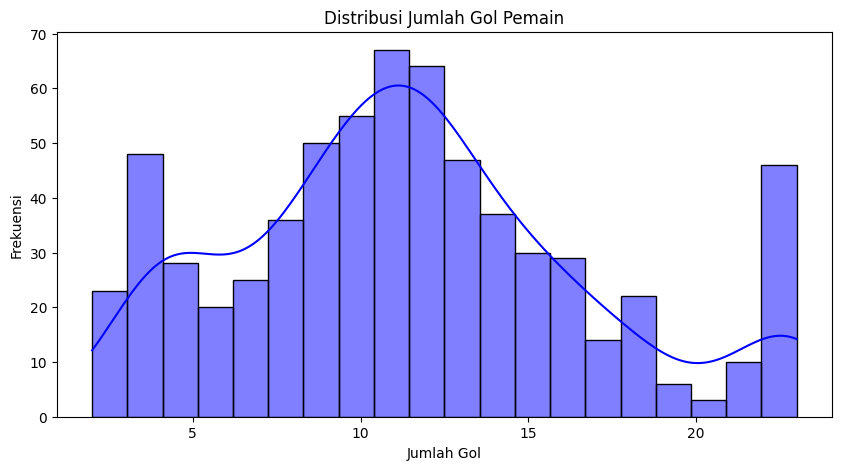

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Goals"], bins=20, kde=True, color="blue")
plt.title("Distribusi Jumlah Gol Pemain")
plt.xlabel("Jumlah Gol")
plt.ylabel("Frekuensi")
plt.show()

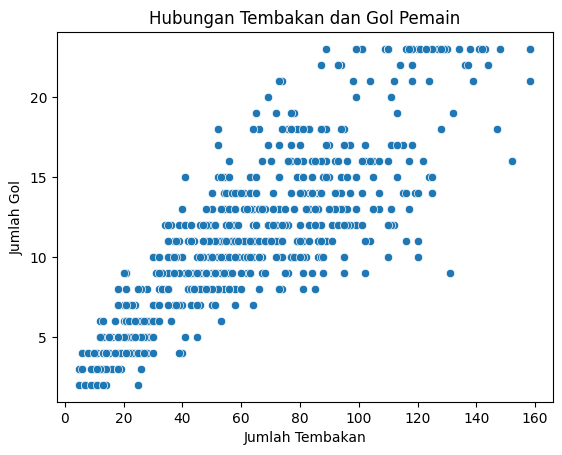

In [38]:
sns.scatterplot(x=df["Shots"], y=df["Goals"])
plt.title("Hubungan Tembakan dan Gol Pemain")
plt.xlabel("Jumlah Tembakan")
plt.ylabel("Jumlah Gol")
plt.show()

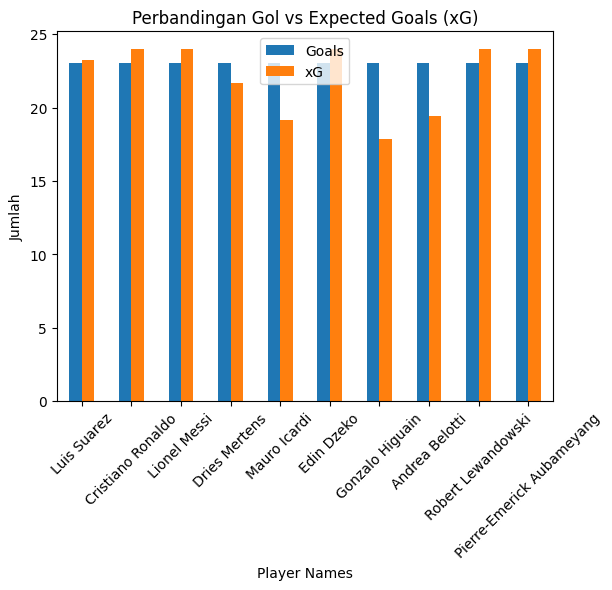

In [39]:
top_scorers = df.nlargest(10, "Goals")
top_scorers[["Player Names", "Goals", "xG"]].set_index("Player Names").plot(kind="bar")
plt.title("Perbandingan Gol vs Expected Goals (xG)")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

# Insight dari Visualisasi Data`

**1. Distribusi Jumlah Gol Pemain**

Sebagian besar pemain mencetak gol dalam jumlah sedang, menunjukkan bahwa hanya sedikit pemain yang sangat produktif.
Ada beberapa outlier yang mencetak gol jauh lebih banyak dibanding pemain lain, menunjukkan striker kelas atas di dataset ini.

**2. Hubungan antara Jumlah Tembakan dan Gol**

Ada korelasi positif antara jumlah tembakan dan jumlah gol → semakin banyak tembakan yang dilakukan, semakin tinggi kemungkinan mencetak gol.
Namun, ada beberapa pemain dengan jumlah tembakan tinggi tetapi gol rendah, yang mungkin menunjukkan akurasi atau penyelesaian akhir yang buruk.

**3. Perbandingan Gol vs Expected Goals (xG) untuk Pemain Terbaik**

Beberapa pemain mencetak lebih banyak gol daripada xG mereka, menunjukkan bahwa mereka lebih efektif dalam menyelesaikan peluang dibanding ekspektasi model statistik.
Sebaliknya, ada pemain dengan xG tinggi tetapi gol lebih sedikit, yang mungkin mengalami kesulitan dalam penyelesaian akhir atau kurang beruntung dalam mencetak gol.

# Tindakan yang Bisa Diambil

**Untuk Pelatih & Analis Tim**

Fokus pada pemain dengan xG tinggi tetapi gol rendah, karena mereka mungkin butuh latihan finishing yang lebih baik.
Identifikasi pemain dengan konversi gol tinggi, yang bisa menjadi aset utama dalam strategi penyerangan.

**Untuk Manajemen & Rekrutmen**

Gunakan data ini untuk menilai striker yang efisien dalam menyelesaikan peluang sebelum merekrut mereka.
Jika ada pemain dengan banyak tembakan tapi golnya sedikit, bisa menjadi pertimbangan apakah mereka cocok untuk taktik tim.

**Untuk Pemain**

Pemain dengan banyak tembakan tetapi sedikit gol bisa lebih fokus pada akurasi dan pengambilan keputusan di depan gawang.
Pemain dengan konversi tinggi bisa menjadi contoh untuk meningkatkan teknik finishing bagi pemain lain.